<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
<br>
<h2>Aprendizagem Automática (AA)</h3>
<h3>2º Trabalho Laboratorial – Classificação de Críticas de Cinema do IMDb </h3>
<br>

<br>
Trabalho Realizado por:<br>
Gonçalo Silva <b>A48328</b><br>
Diogo Lobo <b>A48168</b><br>
Turma 52D<br><br>
Docente: Gonçalo Xufre <br>
<br>
9 de Dezembro de 2024
</center>


In [77]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as aggClus
from scipy.cluster.hierarchy import dendrogram

In [78]:
import itertools

def plotMatriz(modelo,xtest,ytest,string):
    y_pred = modelo.predict(xtest)
    print(classification_report(ytest, y_pred))
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(ytest, y_pred),annot=True,fmt='g')
    plt.title(string)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [79]:
def plotMatrizRegression(modelo,xtest,ytest,string):
    y_pred = modelo.predict(xtest)
    # Arredondamento
    y_pred = np.round(y_pred)

    # Limitar os valores no intervalo [1, 10]
    y_pred = np.clip(y_pred, 1, 10)

    y_pred[y_pred == 5] = 4  # Transforma 5 em 4
    y_pred[y_pred == 6] = 7  # Transforma 6 em 7
    
    print(classification_report(ytest, y_pred))
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(y_pred,ytest),annot=True,fmt='g')
    plt.title(string)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [80]:
D = pickle.load(open('imdbFull.p','rb'))

In [81]:
Docs = D.data
y = D.target
descr = D.DESCR
print(descr)
print(len(Docs))
print(len(y))


This dataset contains movie reviews along with their associated binary sentiment polarity labels. It is intended to serve as a benchmark for sentiment classification. This document outlines how the dataset was gathered, and how to use the files provided.
For more details see: http://ai.stanford.edu/~amaas/data/sentiment/
50000
50000


In [82]:
# from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer

# porterStemFunc = PorterStemmer()
# Docs_PorterStem = [' '.join([porterStemFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_PorterStem,open('docsPorterStem.p','wb'))

# snowballSteamFunc = SnowballStemmer('english')
# Docs_SnowballStem = [' '.join([snowballSteamFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_SnowballStem,open('docsSnowballStem.p','wb'))

# lancasterStemFunc = LancasterStemmer()
# Docs_LancasterStem = [' '.join([lancasterStemFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_PorterStem,open('docsLancasterStem.p','wb'))

# print(Docs_PorterStem[0])
# print(Docs_SnowballStem[0])
# print(Docs_LancasterStem[0])



In [83]:
DocsPorterStem = pickle.load(open('docsPorterStem.p','rb'))
DocsSnowballStem = pickle.load(open('docsSnowballStem.p','rb'))
DocsLancasterStem = pickle.load(open('docslancasterStem.p','rb'))

print(DocsPorterStem[0])
print(DocsSnowballStem[0])
print(DocsLancasterStem[0])

zero day lead you to think, even re-think whi two boys/young men would do what they did - commit mutual suicid via slaughter their classmates. it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own/mutu world via coupl destruction.<br /><br />it is not a perfect movi but given what money/tim the filmmak and actor had - it is a remark product. in term of explain the motiv and action of the two young suicide/murder it is better than 'elephant' - in term of be a film that get under our 'rationalistic' skin it is a far, far better film than almost anyth you are like to see. <br /><br />flaw but honest with a terribl honesty.
zero day lead you to think, even re-think whi two boys/young men would do what they did - commit mutual suicid via slaughter their classmates. it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own/mutu worl

In [84]:
print(DocsLancasterStem[0])
Docs =[re.sub(r'[^a-z-A-Z\u00c0-\u00FF]+',' ',doc)for doc in DocsPorterStem]
print(Docs[0])
# Tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
Tfidf = TfidfVectorizer(min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
X = Tfidf.transform(Docs)

zero day lead you to think, even re-think whi two boys/young men would do what they did - commit mutual suicid via slaughter their classmates. it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own/mutu world via coupl destruction.<br /><br />it is not a perfect movi but given what money/tim the filmmak and actor had - it is a remark product. in term of explain the motiv and action of the two young suicide/murder it is better than 'elephant' - in term of be a film that get under our 'rationalistic' skin it is a far, far better film than almost anyth you are like to see. <br /><br />flaw but honest with a terribl honesty.
zero day lead you to think even re-think whi two boys young men would do what they did - commit mutual suicid via slaughter their classmates it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own mutu world 

In [85]:
DocsTrain, DocsTest, ytrain, ytest = train_test_split(X,y,test_size=0.50,shuffle=False,random_state=18)
DocsValTrain, DocsValTest, yValTrain, yValTest = train_test_split(DocsTrain,ytrain,test_size=0.2,random_state=18,shuffle=False)

--- 

## Logistic Regression

In [86]:
LogReg = LogisticRegression(penalty='l2',C=1,max_iter=1000,tol=0.0001,solver='lbfgs',random_state=18)
LogReg.fit(DocsValTrain,yValTrain)
print(LogReg.score(DocsValTrain,yValTrain))
print(LogReg.score(DocsValTest,yValTest))

0.6862
0.4272


              precision    recall  f1-score   support

           1       0.54      0.84      0.66      1018
           2       0.28      0.07      0.12       454
           3       0.33      0.14      0.19       481
           4       0.38      0.34      0.36       539
           7       0.33      0.25      0.29       525
           8       0.28      0.25      0.26       618
           9       0.19      0.05      0.07       441
          10       0.45      0.74      0.56       924

    accuracy                           0.43      5000
   macro avg       0.35      0.34      0.31      5000
weighted avg       0.38      0.43      0.37      5000



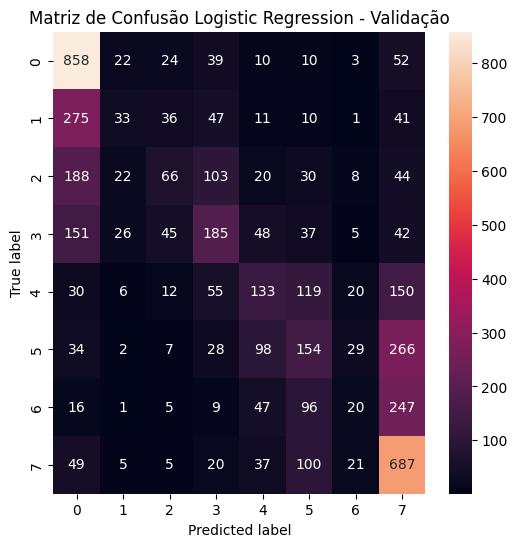

In [87]:
plotMatriz(LogReg,DocsValTest,yValTest,'Matriz de Confusão Logistic Regression - Validação')

In [88]:
LogReg.fit(DocsTrain,ytrain)
print(LogReg.score(DocsTrain,ytrain))
print(LogReg.score(DocsTest,ytest))

0.66936
0.4214


              precision    recall  f1-score   support

           1       0.52      0.82      0.64      5022
           2       0.22      0.06      0.09      2302
           3       0.26      0.12      0.16      2541
           4       0.31      0.33      0.32      2635
           7       0.31      0.23      0.27      2307
           8       0.26      0.24      0.25      2850
           9       0.22      0.05      0.08      2344
          10       0.49      0.76      0.59      4999

    accuracy                           0.42     25000
   macro avg       0.32      0.32      0.30     25000
weighted avg       0.36      0.42      0.37     25000



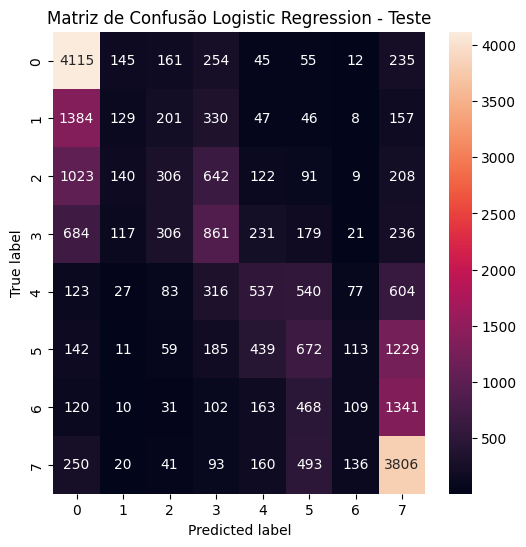

In [89]:
plotMatriz(LogReg,DocsTest,ytest,'Matriz de Confusão Logistic Regression - Teste')

--- 

## SVC

In [90]:
svc = LinearSVC(C=.1,max_iter=1000,dual=False,fit_intercept=False,penalty='l2',loss='squared_hinge',class_weight=None,random_state=18)

svc.fit(DocsValTrain, yValTrain)

print('Score treino: ', svc.score(DocsValTrain, yValTrain))
print('Score teste: ', svc.score(DocsValTest,yValTest))   

Score treino:  0.668
Score teste:  0.4266


              precision    recall  f1-score   support

           1       0.51      0.88      0.65      1018
           2       0.28      0.04      0.07       454
           3       0.32      0.10      0.15       481
           4       0.40      0.32      0.36       539
           7       0.33      0.24      0.28       525
           8       0.29      0.24      0.26       618
           9       0.19      0.04      0.06       441
          10       0.44      0.77      0.56       924

    accuracy                           0.43      5000
   macro avg       0.34      0.33      0.30      5000
weighted avg       0.37      0.43      0.36      5000



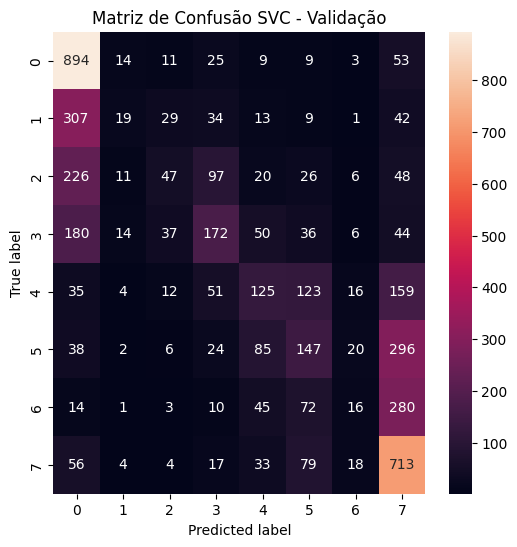

In [91]:
plotMatriz(svc,DocsValTest,yValTest,'Matriz de Confusão SVC - Validação')

In [92]:
svc.fit(DocsTrain,ytrain)
print(svc.score(DocsTrain,ytrain))
print(svc.score(DocsTest,ytest))

0.65636
0.42292


              precision    recall  f1-score   support

           1       0.50      0.85      0.63      5022
           2       0.18      0.03      0.06      2302
           3       0.25      0.09      0.13      2541
           4       0.32      0.32      0.32      2635
           7       0.32      0.22      0.26      2307
           8       0.27      0.21      0.24      2850
           9       0.22      0.03      0.06      2344
          10       0.48      0.79      0.60      4999

    accuracy                           0.42     25000
   macro avg       0.32      0.32      0.29     25000
weighted avg       0.35      0.42      0.35     25000



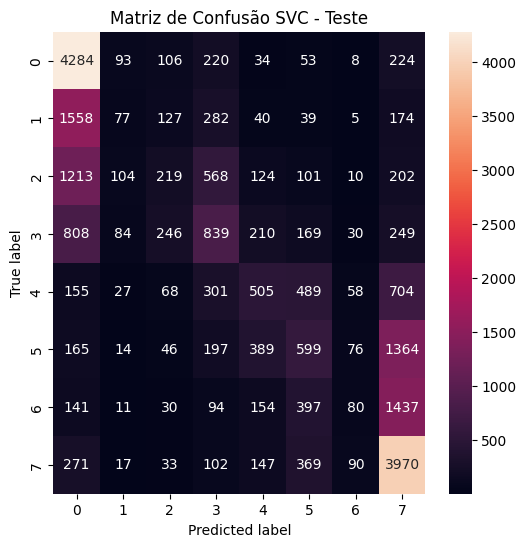

In [93]:
plotMatriz(svc,DocsTest,ytest,'Matriz de Confusão SVC - Teste')

---

## SVR

              precision    recall  f1-score   support

           1       0.68      0.25      0.37      1018
           2       0.19      0.16      0.17       454
           3       0.17      0.18      0.17       481
           4       0.22      0.45      0.29       539
           7       0.19      0.49      0.28       525
           8       0.24      0.24      0.24       618
           9       0.21      0.20      0.20       441
          10       0.63      0.16      0.25       924

    accuracy                           0.26      5000
   macro avg       0.32      0.27      0.25      5000
weighted avg       0.38      0.26      0.26      5000



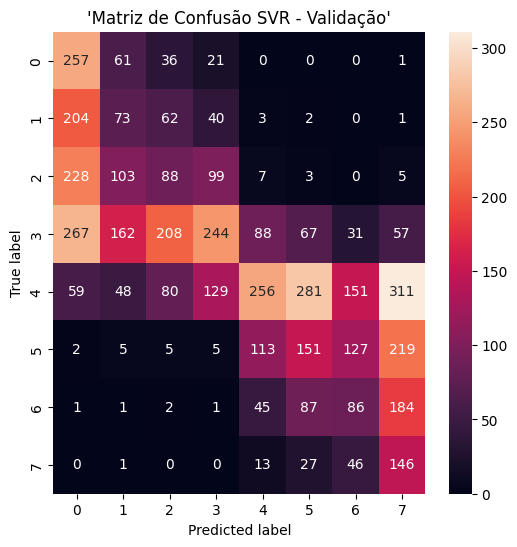

Score (treino): 0.7303949079062417
Score (teste): 0.6176169987047675


In [94]:
linearSVR =LinearSVR(C=1.0,dual=True,epsilon=0.5,loss='epsilon_insensitive',max_iter=2000,random_state=18)
linearSVR.fit(DocsValTrain,yValTrain)

plotMatrizRegression(linearSVR,DocsValTest,yValTest,"'Matriz de Confusão SVR - Validação'")
# Avaliar o modelo no conjunto de treino e teste
print("Score (treino):", linearSVR.score(DocsValTrain, yValTrain))
print("Score (teste):", linearSVR.score(DocsValTest, yValTest))


              precision    recall  f1-score   support

           1       0.66      0.23      0.34      5022
           2       0.21      0.17      0.19      2302
           3       0.19      0.19      0.19      2541
           4       0.21      0.51      0.30      2635
           7       0.18      0.53      0.27      2307
           8       0.21      0.21      0.21      2850
           9       0.19      0.14      0.16      2344
          10       0.63      0.13      0.22      4999

    accuracy                           0.25     25000
   macro avg       0.31      0.27      0.24     25000
weighted avg       0.38      0.25      0.25     25000



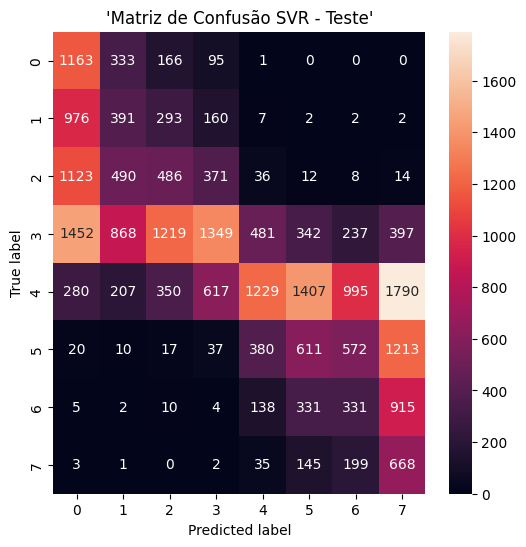

0.7280104929754037
0.6009610094561642


In [95]:
linearSVR.fit(DocsTrain,ytrain)


plotMatrizRegression(linearSVR,DocsTest,ytest,"'Matriz de Confusão SVR - Teste'")

print(linearSVR.score(DocsTrain,ytrain))
print(linearSVR.score(DocsTest,ytest))

---

## Linear Regression

              precision    recall  f1-score   support

           1       0.32      0.43      0.36      1018
           2       0.12      0.06      0.08       454
           3       0.10      0.05      0.07       481
           4       0.13      0.13      0.13       539
           7       0.11      0.12      0.11       525
           8       0.16      0.08      0.10       618
           9       0.12      0.07      0.09       441
          10       0.29      0.46      0.36       924

    accuracy                           0.23      5000
   macro avg       0.17      0.18      0.16      5000
weighted avg       0.19      0.23      0.20      5000



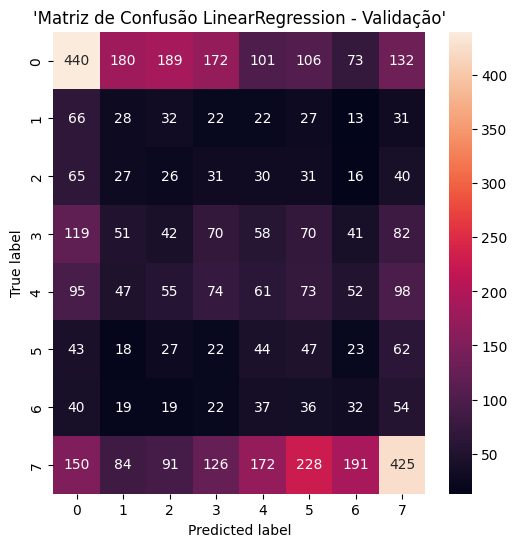

Score treino:  0.9999978573710427
Score validação:  -3.234080716036054


In [96]:
linearRegression = LinearRegression(copy_X=True,fit_intercept=True,positive=False)

linearRegression.fit(DocsValTrain, yValTrain)

plotMatrizRegression(linearRegression,DocsValTest,yValTest,"'Matriz de Confusão LinearRegression - Validação'")

print('Score treino: ', linearRegression.score(DocsValTrain, yValTrain))
print('Score validação: ', linearRegression.score(DocsValTest, yValTest))

              precision    recall  f1-score   support

           1       0.26      0.43      0.33      5022
           2       0.11      0.05      0.07      2302
           3       0.12      0.06      0.08      2541
           4       0.11      0.10      0.10      2635
           7       0.10      0.10      0.10      2307
           8       0.13      0.05      0.07      2850
           9       0.12      0.05      0.07      2344
          10       0.27      0.42      0.33      4999

    accuracy                           0.21     25000
   macro avg       0.15      0.16      0.14     25000
weighted avg       0.18      0.21      0.18     25000



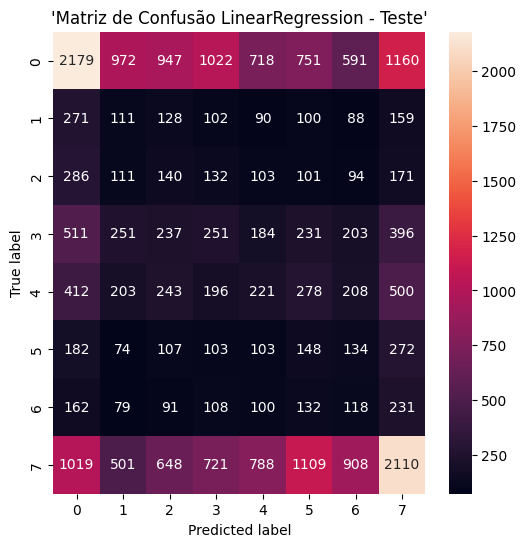

0.9750997347165685
-10.920551691053937


In [97]:
linearRegression.fit(DocsTrain,ytrain)
plotMatrizRegression(linearRegression,DocsTest,ytest,"'Matriz de Confusão LinearRegression - Teste'")
print(linearRegression.score(DocsTrain,ytrain))
print(linearRegression.score(DocsTest,ytest))

---

## Bi-Gramas

In [98]:
Docs_bg =[re.sub(r'[^a-z-A-Z\u00c0-\u00FF]+',' ',doc)for doc in DocsPorterStem]
Tfidf_bg = TfidfVectorizer(ngram_range=(1,2),min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
# Tfidf = TfidfVectorizer(min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
X_bg = Tfidf_bg.transform(Docs_bg)

In [99]:
DocsTrain_bg, DocsTest_bg, ytrain_bg, ytest_bg = train_test_split(X_bg,y,test_size=0.50,shuffle=False,random_state=18)
DocsValTrain_bg, DocsValTest_bg, yValTrain_bg, yValTest_bg = train_test_split(DocsTrain_bg,ytrain_bg,test_size=0.2,random_state=18,shuffle=False)

---

## Logistic Regression - Bi-Gramas

In [100]:
LogReg_bg = LogisticRegression(penalty='l2',C=1,max_iter=1000,tol=0.0001,solver='lbfgs',random_state=18)
LogReg_bg.fit(DocsValTrain_bg,yValTrain_bg)
print(LogReg_bg.score(DocsValTrain_bg,yValTrain_bg))
print(LogReg_bg.score(DocsValTest_bg,yValTest_bg))

0.8066
0.4332


              precision    recall  f1-score   support

           1       0.50      0.89      0.64      1018
           2       0.26      0.03      0.06       454
           3       0.34      0.09      0.14       481
           4       0.39      0.35      0.37       539
           7       0.36      0.23      0.28       525
           8       0.31      0.26      0.28       618
           9       0.21      0.02      0.03       441
          10       0.44      0.79      0.56       924

    accuracy                           0.43      5000
   macro avg       0.35      0.33      0.30      5000
weighted avg       0.38      0.43      0.36      5000



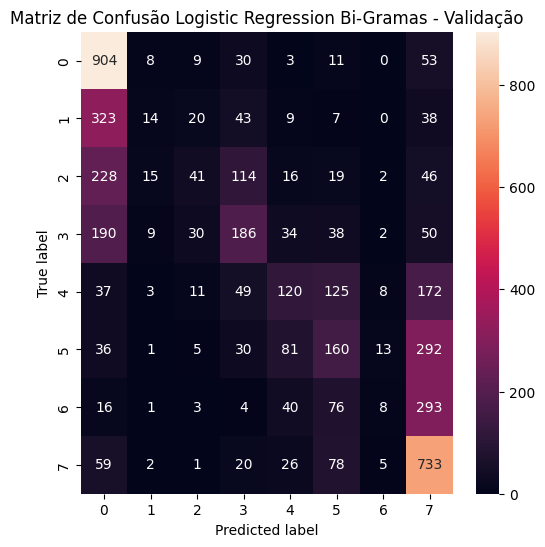

In [101]:
plotMatriz(LogReg_bg,DocsValTest_bg,yValTest_bg,'Matriz de Confusão Logistic Regression Bi-Gramas - Validação')

In [102]:
LogReg_bg.fit(DocsTrain_bg,ytrain_bg)
print(LogReg_bg.score(DocsTrain_bg,ytrain_bg))
print(LogReg_bg.score(DocsTest_bg,ytest_bg))

0.79852
0.43472


              precision    recall  f1-score   support

           1       0.51      0.87      0.64      5022
           2       0.26      0.03      0.06      2302
           3       0.28      0.09      0.14      2541
           4       0.34      0.34      0.34      2635
           7       0.34      0.22      0.26      2307
           8       0.27      0.23      0.25      2850
           9       0.25      0.02      0.03      2344
          10       0.48      0.82      0.60      4999

    accuracy                           0.43     25000
   macro avg       0.34      0.33      0.29     25000
weighted avg       0.37      0.43      0.36     25000



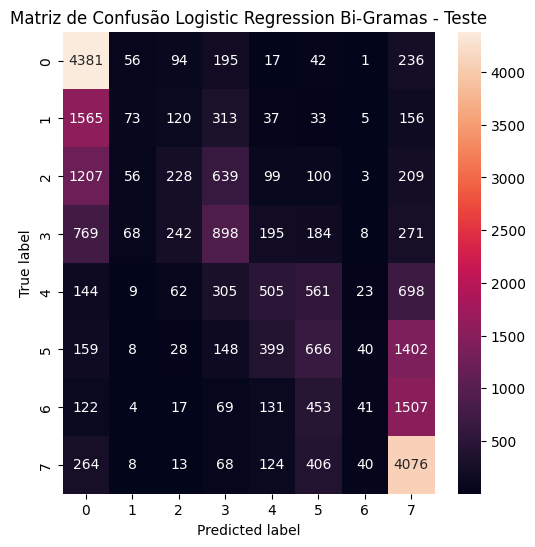

In [103]:
plotMatriz(LogReg_bg,DocsTest_bg,ytest_bg,'Matriz de Confusão Logistic Regression Bi-Gramas - Teste')

---

## SVC - Bi-Gramas

In [104]:
svc_bg = LinearSVC(C=.1,max_iter=1000,dual=False,fit_intercept=False,penalty='l2',loss='squared_hinge',class_weight=None,random_state=18)

svc_bg.fit(DocsValTrain_bg, yValTrain_bg)

print('Score treino: ', svc_bg.score(DocsValTrain_bg, yValTrain_bg))
print('Score teste: ', svc_bg.score(DocsValTest_bg,yValTest_bg))   

Score treino:  0.79975
Score teste:  0.426


              precision    recall  f1-score   support

           1       0.49      0.91      0.64      1018
           2       0.29      0.02      0.04       454
           3       0.32      0.06      0.10       481
           4       0.42      0.32      0.37       539
           7       0.34      0.22      0.27       525
           8       0.29      0.23      0.26       618
           9       0.18      0.02      0.03       441
          10       0.43      0.78      0.55       924

    accuracy                           0.43      5000
   macro avg       0.34      0.32      0.28      5000
weighted avg       0.37      0.43      0.35      5000



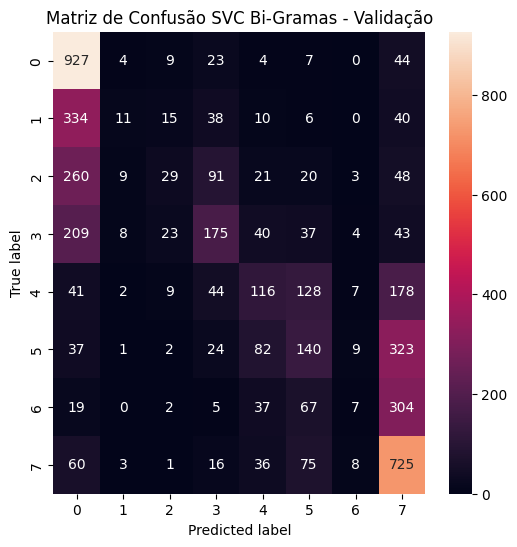

In [105]:
plotMatriz(svc_bg,DocsValTest_bg,yValTest_bg,'Matriz de Confusão SVC Bi-Gramas - Validação')

In [106]:
svc_bg.fit(DocsTrain_bg,ytrain_bg)
print(svc_bg.score(DocsTrain_bg,ytrain_bg))
print(svc_bg.score(DocsTest_bg,ytest_bg))

0.78788
0.43492


              precision    recall  f1-score   support

           1       0.49      0.89      0.63      5022
           2       0.24      0.02      0.04      2302
           3       0.28      0.07      0.12      2541
           4       0.35      0.33      0.34      2635
           7       0.33      0.21      0.26      2307
           8       0.28      0.21      0.24      2850
           9       0.29      0.02      0.04      2344
          10       0.48      0.83      0.61      4999

    accuracy                           0.43     25000
   macro avg       0.34      0.32      0.28     25000
weighted avg       0.37      0.43      0.35     25000



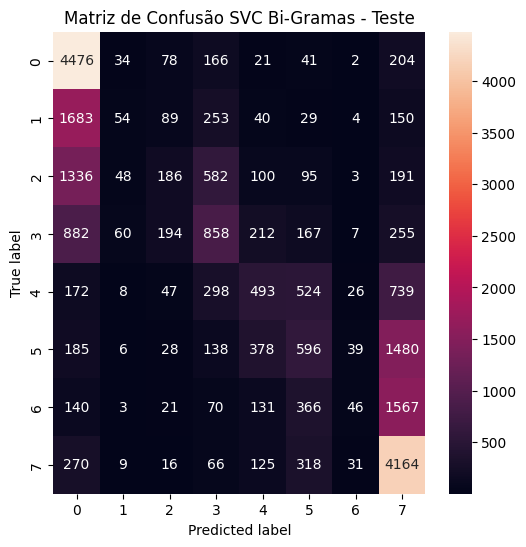

In [107]:
plotMatriz(svc_bg,DocsTest_bg,ytest_bg,'Matriz de Confusão SVC Bi-Gramas - Teste')

---

## SVR - Bi-Gramas

              precision    recall  f1-score   support

           1       0.74      0.24      0.36      1018
           2       0.19      0.16      0.18       454
           3       0.19      0.21      0.20       481
           4       0.24      0.53      0.33       539
           7       0.21      0.54      0.30       525
           8       0.25      0.25      0.25       618
           9       0.20      0.18      0.19       441
          10       0.60      0.12      0.20       924

    accuracy                           0.27      5000
   macro avg       0.33      0.28      0.25      5000
weighted avg       0.39      0.27      0.26      5000



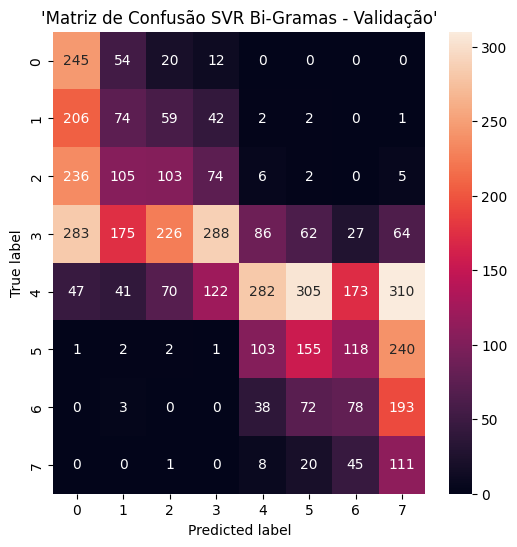

0.8019934543374861
0.6386051036237654


In [108]:
linearSVR_bg =LinearSVR(C=1.0,dual=True,epsilon=0.5,loss='epsilon_insensitive',max_iter=2000,random_state=18)
linearSVR_bg.fit(DocsValTrain_bg,yValTrain_bg)

plotMatrizRegression(linearSVR_bg,DocsValTest_bg,yValTest_bg,"'Matriz de Confusão SVR Bi-Gramas - Validação'")

print(linearSVR_bg.score(DocsValTrain_bg,yValTrain_bg))
print(linearSVR_bg.score(DocsValTest_bg,yValTest_bg))

              precision    recall  f1-score   support

           1       0.69      0.21      0.32      5022
           2       0.22      0.18      0.20      2302
           3       0.20      0.21      0.20      2541
           4       0.23      0.54      0.32      2635
           7       0.19      0.55      0.28      2307
           8       0.22      0.24      0.23      2850
           9       0.21      0.15      0.18      2344
          10       0.66      0.12      0.21      4999

    accuracy                           0.25     25000
   macro avg       0.33      0.28      0.24     25000
weighted avg       0.40      0.25      0.25     25000



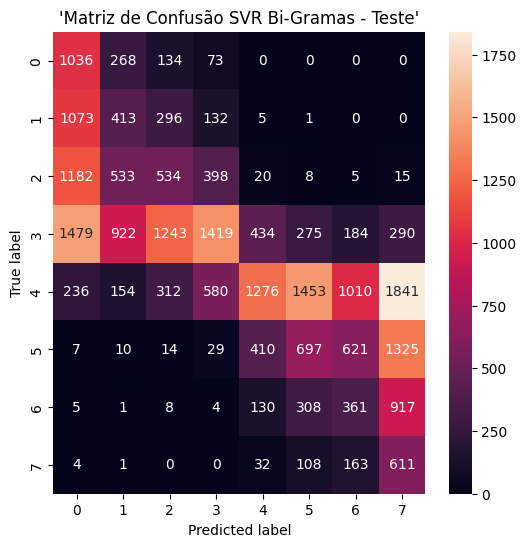

0.8034966235584976
0.6350319555266827


In [109]:
linearSVR_bg.fit(DocsTrain_bg,ytrain_bg)
plotMatrizRegression(linearSVR_bg,DocsTest_bg,ytest_bg,"'Matriz de Confusão SVR Bi-Gramas - Teste'")
print(linearSVR_bg.score(DocsTrain_bg,ytrain_bg))
print(linearSVR_bg.score(DocsTest_bg,ytest_bg))

---

## Linear Regression - Bi-Gramas

              precision    recall  f1-score   support

           1       0.66      0.33      0.44      1018
           2       0.19      0.18      0.18       454
           3       0.22      0.21      0.22       481
           4       0.22      0.42      0.29       539
           7       0.19      0.41      0.26       525
           8       0.26      0.23      0.25       618
           9       0.21      0.21      0.21       441
          10       0.57      0.26      0.35       924

    accuracy                           0.29      5000
   macro avg       0.31      0.28      0.27      5000
weighted avg       0.37      0.29      0.30      5000



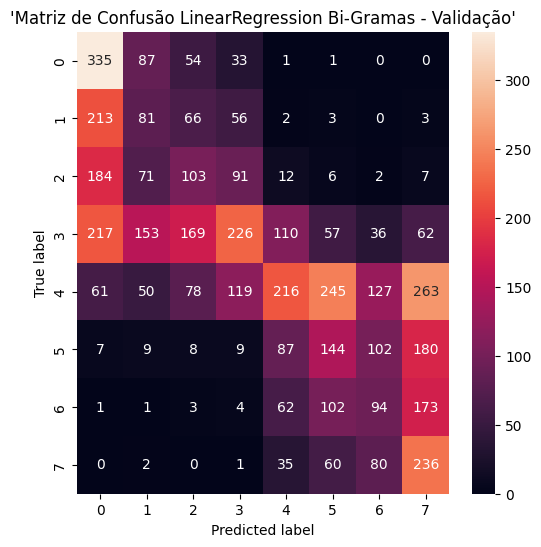

0.8042034273004173
0.8006367795835377


In [110]:
linearRegression_bg = LinearRegression(copy_X=True,fit_intercept=True,positive=False)

linearRegression_bg.fit(DocsValTrain_bg,yValTrain_bg)

plotMatrizRegression(linearRegression_bg,DocsValTest_bg,yValTest_bg,"'Matriz de Confusão LinearRegression Bi-Gramas - Validação'")

print(linearSVR_bg.score(DocsValTrain_bg,yValTrain_bg))
print(linearSVR_bg.score(DocsValTest_bg,yValTest_bg))


              precision    recall  f1-score   support

           1       0.62      0.29      0.39      5022
           2       0.20      0.18      0.19      2302
           3       0.19      0.19      0.19      2541
           4       0.20      0.43      0.27      2635
           7       0.17      0.44      0.24      2307
           8       0.22      0.20      0.21      2850
           9       0.19      0.16      0.17      2344
          10       0.57      0.20      0.30      4999

    accuracy                           0.26     25000
   macro avg       0.30      0.26      0.25     25000
weighted avg       0.36      0.26      0.27     25000



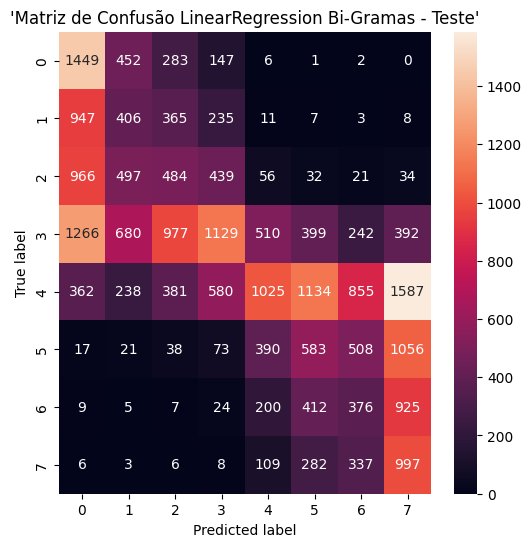

Score treino:  0.9999983355502798
Score teste:  0.5679188411022056


In [111]:
linearRegression_bg.fit(DocsTrain_bg, ytrain_bg)

plotMatrizRegression(linearRegression_bg,DocsTest_bg,ytest_bg,"'Matriz de Confusão LinearRegression Bi-Gramas - Teste'")

print('Score treino: ', linearRegression_bg.score(DocsTrain_bg, ytrain_bg))
print('Score teste: ', linearRegression_bg.score(DocsTest_bg, ytest_bg))


---

# Clustering

In [114]:
param_grid = {
    'n_clusters': [5, 8, 10, 12],  # You can adjust the range based on your data and needs
    'init': ['k-means++', 'random'],
    'n_init': [5, 10],
    'max_iter': [300, 500],
    'tol': [0.0001, 0.001]
}




kmeans = KMeans(n_clusters=2,init='k-means++',n_init=5,max_iter=1000,tol=.00001,verbose=0,random_state=18)
kmeans = kmeans.fit(X.T,y=y)
C = kmeans.cluster_centers_
labels = kmeans.labels_

In [115]:
# print(C)
# print(y)
Xdense = X.T.toarray()
print(X.shape)
print(labels.shape)
# plt.figure(figsize=(10,5))
# plt.title('Clusters encontrados')
for i in range((10)):
    print(len(Xdense[labels==i]))
# print(len(Xdense[labels==0]))
# print(len(Xdense[labels==1]))
# print(len(Xdense[labels==2]))
# print(len(Xdense[labels==3]))
# print(len(Xdense[labels==4]))
# print(len(Xdense[labels==5]))
# print(len(Xdense[labels==6]))
# print(len(Xdense[labels==7]))
# print(len(Xdense[labels==8]))
# print(len(Xdense[labels==9]))
# print(len(Xdense[labels==10]))
# print(len(Xdense[labels==11]))
# print(len(Xdense[labels==11]))
# plt.plot(Xdense[labels==1,0],Xdense[labels==1,1],'g.')
# plt.plot(Xdense[labels==2,0],Xdense[labels==2,1],'b.')
# plt.plot(Xdense[labels==3,0],Xdense[labels==3,1],'r.')
# plt.plot(Xdense[labels==4,0],Xdense[labels==4,1],'c.')
# plt.plot(Xdense[labels==7,0],Xdense[labels==7,1],'m.')
# plt.plot(Xdense[labels==8,0],Xdense[labels==8,1],'y.')
# plt.plot(Xdense[labels==9,0],Xdense[labels==9,1],'k.')
# plt.plot(Xdense[labels==10,0],Xdense[labels==10,1],'tab:orange')
# plt.plot(C[:,0],C[:,1],'k*')
# plt.grid()
# plt.show()

(50000, 23115)
(23115,)
13
23102
0
0
0
0
0
0
0
0
